# PE EVALUABLE: NBA

Vamos a aplicar los contenidos aprendidos tratando un caso real, los datos de la NBA de 2022-2023. En este sentido yo voy a proponer diferentes preguntas, pero tenéis total libertad para hacer el análisis que considereis oportuno siempre y cuando se trabajane las diferentes correlaciones.

En todos los casos, partiremos de nuestros datos para despúes a través de neustros conocimientos de distribuciones realitzar los cálculos de manera inferencial.

## A1: Anàlisis del DataSet

Vamos a utilizar el dataSet https://www.nbastuffer.com/2022-2023-nba-player-stats/:

* Solo queremos jugadores titulares (más de 25min pp) y que hayan dispustado màs de 10 partidos ¿De cuántos jugadores tenemos datos?
* Para nuestro anàlisis no nos interesan todas las columnas. Nos quedaremos únicamente con Nombre, Equipo, Edad, Posición Partidos Jugados, Minutos por partido, Media de puntos, Media rebotes, Media de Pèrdidas, %TL anotados


In [1]:
import pandas as pd

nba_ds = pd.read_csv('nba.csv', sep=';')

titulares = nba_ds[(nba_ds['MPG'] > 25) & (nba_ds['GP'] > 10)]
print('Tenemos a',titulares.shape[0],'jugadores titulares')

titulares_filtrado = titulares[['FULL NAME', 'TEAM', 'AGE', 'POS', 'GP', 'MPG', 'PPG', 'RPG', 'SPG', 'FT%']]
titulares_filtrado.head()

Tenemos a 165 jugadores titulares


,FULL NAME,TEAM,AGE,POS,GP,MPG,PPG,RPG,SPG,FT%
1,Steven Adams,Mem,29.42,C,26,26.5,8.1,10.2,0.85,0.333
2,Bam Adebayo,Mia,25.42,C-F,28,35.0,20.7,9.8,1.00,0.841
6,Grayson Allen,Mil,27.20,G,26,27.2,10.9,3.6,0.73,0.930
7,Jarrett Allen,Cle,24.66,C,24,33.4,13.7,10.3,0.67,0.719
10,Giannis Antetokounmpo,Mil,28.04,F,24,32.7,30.6,11.1,0.88,0.628


## A2: Anàlisis de la Edad

No nos vamos a centrar únicamente en nuestro caso de jugadores, sino que obtendremos estadísiticos básicos para poder realizar cálculo inferencial

Tenemos la sensación de que los jugadores cada vez juegan más años, así que que queremos responder a las siguientes preguntas:

* ¿Cuál es la probabilidad de que un jugador (de los importantes, filtro inicial) tegan una edad inferior a 23 años?
* ¿Cuál es la probabilidad de que un jugador (de los importantes, filtro inicial) tegan una edad superior a 34 años?
* ¿Cuál es la probabilidad de que un jugador (de los importantes, filtro inicial) tegan una edad entre 28 a 32 años?
* ¿Cuál es la edad a partir de la qual el 90% de los jugadores son menores?


In [21]:
from scipy.stats import norm

mean = titulares_filtrado['AGE'].mean()
dev = titulares_filtrado['AGE'].std()

print('La probabilidad de que un jugador tenga una edad inferior a 23 años es de',round(norm.cdf(23, mean, dev)*100,2),'%')
print('La probabilidad de que un jugador tenga una edad superior a 34 años es de',round((norm.sf(34, mean, dev))*100,2),'%')
print('La probabilidad de que un jugador tenga una edad entre 28 y 32 años es de',round((norm.cdf(32, mean, dev)-norm.cdf(28, mean, dev))*100,2),'%')
print('La edad a partir de la cual el 90% de los jugadores son menores es de', round(norm.ppf(0.9, mean, dev),2),'años')

La probabilidad de que un jugador tenga una edad inferior a 23 años es de 16.66 %
La probabilidad de que un jugador tenga una edad superior a 34 años es de 5.06 %
La probabilidad de que un jugador tenga una edad entre 28 y 32 años es de 29.21 %
La edad a partir de la cual el 90% de los jugadores son menores es de 32.49 años


Con nuestros datos obervacionales: 

* Muestra un gràfico BoxPlot diferenciando entre Centers i Guards, y haz una reflexión sobre sus medias y su dispersión.

* El Sentido me dice que cuanta más edad mayor restricción de minutos, eso se cumple, existe una correlación entre esas dos variables?

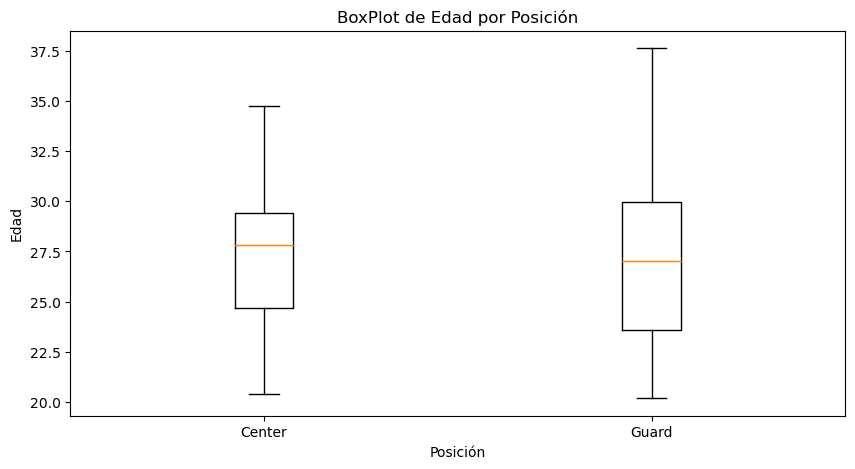

Los jugadores de posición Center tienen una edad media mayor que los de posición Guard, y la dispersión de los jugadores de posición Guard es mayor que la de los de posición Center


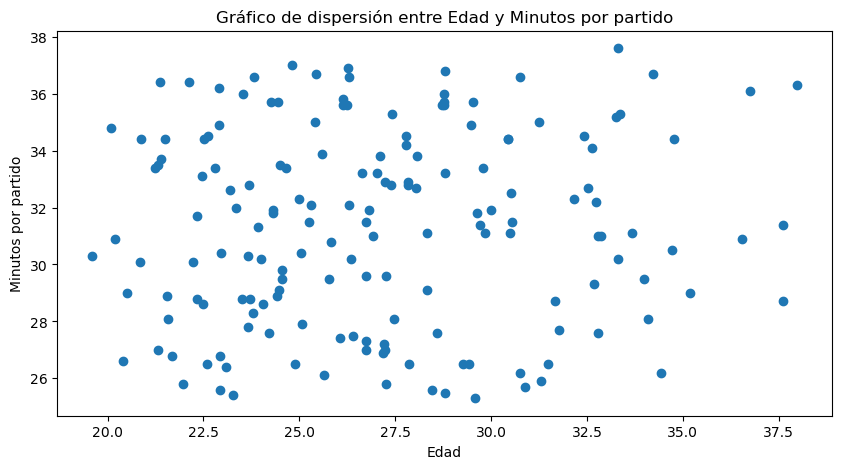

No existe una correlación entre la edad y los minutos por partido, ya que los jugadores de mayor edad no tienen una restricción de minutos mayor que los de menor edad


In [3]:
import matplotlib.pyplot as plt

ages_centers = titulares_filtrado[titulares_filtrado['POS'] == 'C']['AGE']
ages_guards = titulares_filtrado[titulares_filtrado['POS'] == 'G']['AGE']
plt.figure(figsize=(10,5))
plt.title('BoxPlot de Edad por Posición')
plt.xlabel('Posición')
plt.ylabel('Edad')
plt.boxplot([ages_centers, ages_guards], labels=['Center', 'Guard'])
plt.show()
print('Los jugadores de posición Center tienen una edad media mayor que los de posición Guard, y la dispersión de los jugadores de posición Guard es mayor que la de los de posición Center')

plt.figure(figsize=(10,5))
plt.title('Gráfico de dispersión entre Edad y Minutos por partido')
plt.xlabel('Edad')
plt.ylabel('Minutos por partido')
plt.scatter(titulares_filtrado['AGE'],titulares_filtrado['MPG'])
plt.show()
print('No existe una correlación entre la edad y los minutos por partido, ya que los jugadores de mayor edad no tienen una restricción de minutos mayor que los de menor edad')

## A2: Triples de Lebron

Parece que este año lebron no está muy acertado en el triple. Suponiendo que tirara 5 triples por partido, responde a las siguientes preguntas:

* ¿Cuál es la probabilidad de que no meta ninguno?
* ¿Cuál es la probabilidad de que los meta todos?

In [4]:
from scipy.stats import binom

porcentaje = titulares[titulares['FULL NAME'] == 'LeBron James']['3P%'].values[0]

print('La probabilidad que lebron meta 0 triples es de', round(binom.pmf(0,5,porcentaje)*100,2),'%')
print('La probabilidad que lebron meta 5 triples es de', round(binom.pmf(5,5,porcentaje)*100,2),'%')

La probabilidad que lebron meta 0 triples es de 15.41 %
La probabilidad que lebron meta 5 triples es de 0.3 %


Muestra su función de distribución acumulada empírica y responde las siguientes preguntas:

* ¿Cuál es la probabilidad de que meta uno o menos? (Partido de poco acierto)
* ¿Cuál es la probabilidad de que meta tres o màs? (Partido de mucho acierto)

In [5]:
print('La probabilidad que lebron meta 1 o menos triples es de', round(binom.cdf(1,5,porcentaje)*100,2),'%')
print('La probabilidad que lebron meta 3 o más triples es de', round((binom.sf(2,5,porcentaje))*100,2),'%')

La probabilidad que lebron meta 1 o menos triples es de 50.37 %
La probabilidad que lebron meta 3 o más triples es de 17.93 %


## A3 Picadas de Lebron tirando triples

Para hacer este apartado necesitamos el número de triples que se ha tirado lebron en cada partido. Tienes dos opciones:
* Dummy: Mirarlo manualmente y crear un array a mano
* Upgrade: Llamar a la api https://www.balldontlie.io/ (Stats) y obtener los datos



In [6]:
import requests

r = requests.get('https://www.balldontlie.io/api/v1/stats?seasons[]=2022&player_ids[]=237')
lebron = pd.DataFrame(r.json()['data'])
lebron.head()

,id,ast,blk,dreb,fg3_pct,fg3a,fg3m,fg_pct,fga,fgm,...,game,min,oreb,pf,player,pts,reb,stl,team,turnover
0,12068860,6,2,8,0.250000,8,2,0.411765,17,7,...,"{'id': 857369, 'date': '2022-10-20T00:00:00.00...",37,2,3,"{'id': 237, 'first_name': 'LeBron', 'height_fe...",20,10,1,"{'id': 14, 'abbreviation': 'LAL', 'city': 'Los...",2
1,12069595,8,2,7,0.222222,9,2,0.545455,22,12,...,"{'id': 857391, 'date': '2022-10-23T00:00:00.00...",38,1,3,"{'id': 237, 'first_name': 'LeBron', 'height_fe...",31,8,2,"{'id': 14, 'abbreviation': 'LAL', 'city': 'Los...",4
2,12096558,9,0,5,0.250000,8,2,0.380952,21,8,...,"{'id': 857411, 'date': '2022-10-26T00:00:00.00...",35,2,1,"{'id': 237, 'first_name': 'LeBron', 'height_fe...",19,7,1,"{'id': 14, 'abbreviation': 'LAL', 'city': 'Los...",8
3,12159440,5,0,4,0.166667,6,1,0.416667,24,10,...,"{'id': 857429, 'date': '2022-10-28T00:00:00.00...",37,3,2,"{'id': 237, 'first_name': 'LeBron', 'height_fe...",28,7,4,"{'id': 14, 'abbreviation': 'LAL', 'city': 'Los...",3
4,12399558,3,0,6,0.300000,10,3,0.363636,22,8,...,"{'id': 857660, 'date': '2022-11-28T00:00:00.00...",36,1,1,"{'id': 237, 'first_name': 'LeBron', 'height_fe...",21,7,1,"{'id': 14, 'abbreviation': 'LAL', 'city': 'Los...",1


Muestra en un histograma los triples lanzados por lebron, en cuàntos partidos ha lanzado 5 o más?

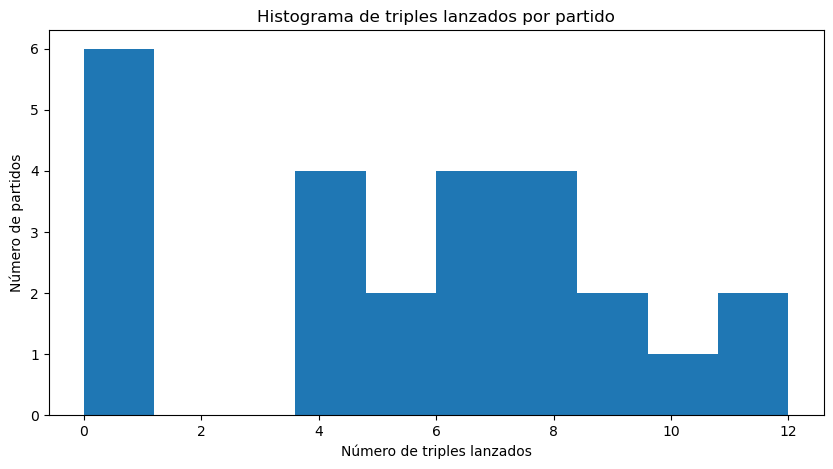

Lebron ha lanzado 5 o más triples en 15 partidos


In [7]:
plt.figure(figsize=(10,5))
plt.title('Histograma de triples lanzados por partido')
plt.xlabel('Número de triples lanzados')
plt.ylabel('Número de partidos')
plt.hist(lebron['fg3a'],bins=10)
plt.show()
print('Lebron ha lanzado 5 o más triples en',lebron[lebron['fg3a'] >= 5].shape[0],'partidos')

A partir de estos datos, vamos a hacer cálculo inferencial imaginando que juega infinitos partidos. Respondemos a la siguientes preguntas:

* ¿Cuál es la probabilidad de que lebron se tire 5 o más triples por partido?
* Como entrenador le he recomendado que tire 3 triples por partido, ¿cuál es la probabilidad de que eso suceda?

In [8]:
from scipy.stats import poisson

porcentaje = lebron['fg3a'].sum()/lebron.shape[0]

print('La probabilidad de que lebron se tire 5 o más triples por partido es de',round((poisson.sf(5,porcentaje))*100,2),'%')
print('La probabilidad de que lebron se tire 3 o más triples por partido es de',round((poisson.sf(3,porcentaje))*100,2),'%')

La probabilidad de que lebron se tire 5 o más triples por partido es de 45.39 %
La probabilidad de que lebron se tire 3 o más triples por partido es de 78.67 %


## A4 Tiempo entre lanzamiento

Lebron se tira un triple en promedio cada 12 minutos jugados en pista. Responde las siguientes preguntas:

* ¿Cuál és la probabilidad de que pase màs de 20 min sin tirarse un triple?
* ¿Cuál és la probabilidad de que se tire un triple entre el min 8 y 15min después del lanzamiento de triple anterior?

In [25]:
from scipy.stats import expon

print('La probabilidad de que pase más de 20 minutos sin tirarse un triple es de',round((expon.sf(20,scale=12))*100,2),'%')
print('La probabilidad de que se tire un triple entre el min 8 y 15 minutos después del lanzamiento de triple anterior es de',round((expon.cdf(15,scale=12)-expon.cdf(8,scale=12))*100,2),'%')

La probabilidad de que pase más de 20 minutos sin tirarse un triple es de 18.89 %
La probabilidad de que se tire un triple entre el min 8 y 15 minutos después del lanzamiento de triple anterior es de 22.69 %
